# QQ Plots

QQ plots are also a very well known tool to visualize GWAS results, and its goal is to visualize the distribution of association $p$-values.

In this notebook we intend to show how can be used the library `IDEAL-GENOM` to generate QQ-plots. 

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import qqplot_draw
from ideal_genom.get_examples import get_trumpet_quantitative_example

The data is taken from the article:

Akiyama, M., et. al. (2019): Characterizing rare and low-frequency height-associated variants in the Japanese population. *Nature communications*, **10**(1), 4393.

It the summary statistics has not been downloaded already, we proceed to fetch it or we get the path to it.

In [2]:
example_path = get_trumpet_quantitative_example()

2025-06-24 10:46:09,859 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT.txt


We load the data by chunks given that the file is not smallm and we just keep the two columns with $p$-values.

In [3]:
chunk_size = 2000

filtered_chunks=[]

for chunk in pd.read_csv(example_path, sep=r'\s+', engine='python', chunksize=chunk_size, usecols=['P_INF', 'P_BOLT']):
    
    filtered_chunks.append(chunk)

df_gwas = pd.concat(filtered_chunks, ignore_index=True)

Let us look at how many SNPs from autosomal chromosomes are present in the summary statistics.

In [4]:
print("Number of SNPs in GWAS data: ", df_gwas.shape[0])
print("Columns in GWAS data: ", df_gwas.columns.to_list())

Number of SNPs in GWAS data:  27211524
Columns in GWAS data:  ['P_INF', 'P_BOLT']


Generate the QQ values for the p-values from the summary statistics.

2025-06-24 10:47:20,756 - INFO - Calculating genomic inflation factor (λ)...
2025-06-24 10:48:06,375 - INFO - Genomic inflation factor (λ) = 1.199936
2025-06-24 10:48:10,211 - INFO - Computing confidence intervals...
2025-06-24 10:48:10,382 - INFO - Plotting Q-Q plot...


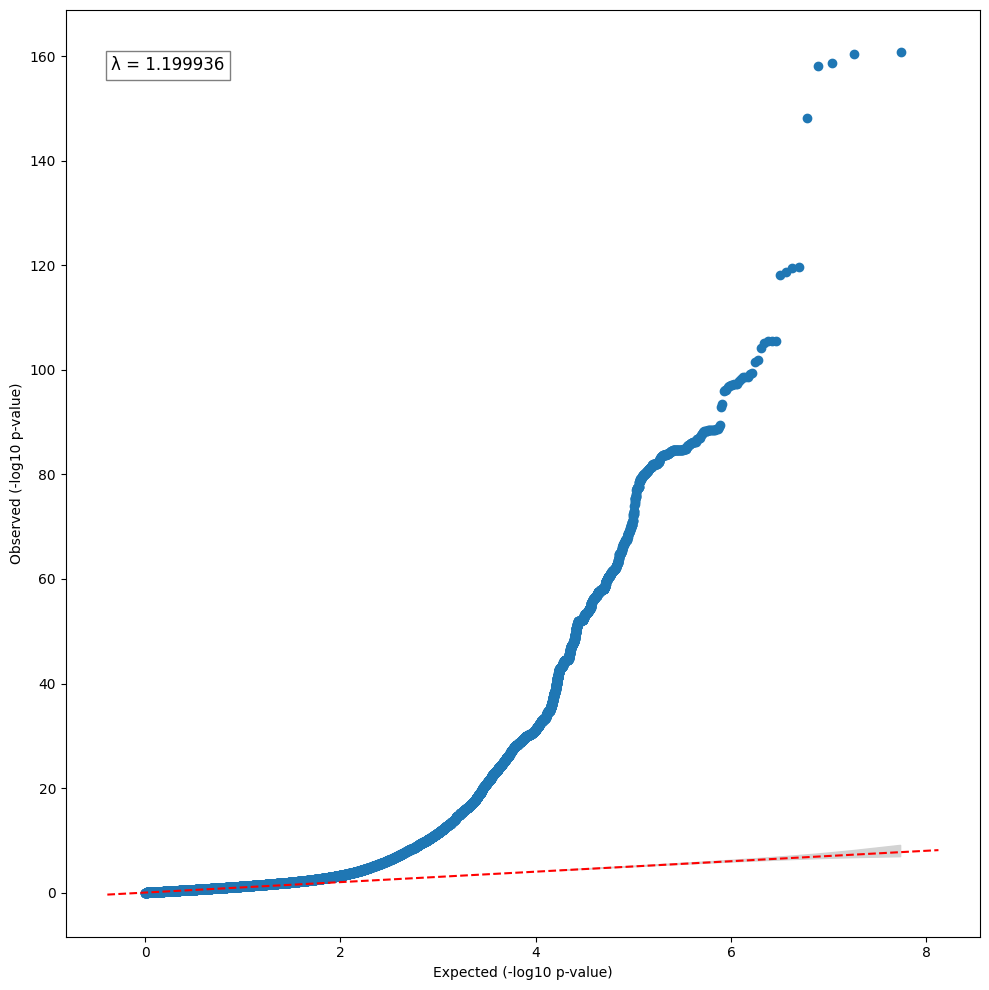

2025-06-24 10:48:11,286 - INFO - Q-Q plot saved as unadjusted_qqplot_gwas.png in /home/luis/CGE/ideal-genom/data/sumstats


True

In [5]:
qqplot_draw(
    df_gwas=df_gwas,
    plots_dir=example_path.parent.as_posix(),
    pval_col='P_INF',
    save_name='unadjusted_qqplot_gwas.png',
    dpi=600
)

Generate the QQ plot for the adjusted $p$-values.

2025-06-24 10:48:11,292 - INFO - Calculating genomic inflation factor (λ)...
2025-06-24 10:48:56,355 - INFO - Genomic inflation factor (λ) = 1.199936
2025-06-24 10:48:59,929 - INFO - Computing confidence intervals...
2025-06-24 10:49:00,101 - INFO - Plotting Q-Q plot...


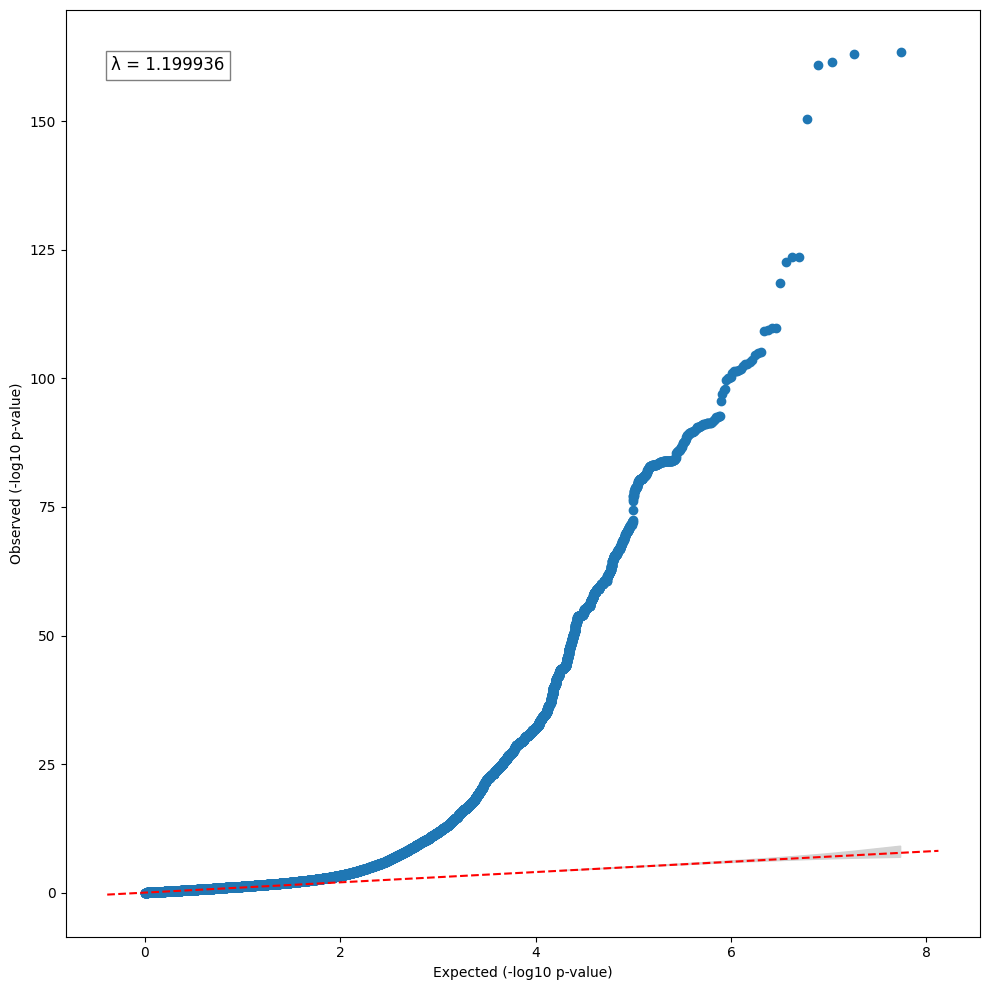

2025-06-24 10:49:00,980 - INFO - Q-Q plot saved as adjusted_qqplot_gwas.png in /home/luis/CGE/ideal-genom/data/sumstats


True

In [6]:
qqplot_draw(
    df_gwas=df_gwas,
    plots_dir=example_path.parent.as_posix(),
    pval_col='P_BOLT',
    save_name='adjusted_qqplot_gwas.png',
    dpi=600
)